# Exploring the food price global database

## Load the libraries and the csv

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [38]:
!ls

 adrian_food_global_pricing.ipynb  'Allan_Data_ Exploration.ipynb'
 adrian_nutrients.ipynb


In [39]:
price_df = pd.read_csv('../raw_data/wfp_food_prices_database.csv')
price_df.head()

/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [40]:
price_df.shape

(1560551, 18)

In [41]:
price_df.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [42]:
price_df['cm_name'].nunique()

777

In [43]:
price_df['cm_name'].sort_values().unique()[-50]

'Wage (non-qualified labour) - Retail'

In [44]:
price_df.isnull().sum()/len(price_df)

adm0_id               0.000000
adm0_name             0.000000
adm1_id               0.000000
adm1_name             0.302027
mkt_id                0.000000
mkt_name              0.000000
cm_id                 0.000000
cm_name               0.000000
cur_id                0.000000
cur_name              0.000000
pt_id                 0.000000
pt_name               0.000000
um_id                 0.000000
um_name               0.000000
mp_month              0.000000
mp_year               0.000000
mp_price              0.000000
mp_commoditysource    1.000000
dtype: float64

In [9]:
#dropping the mp_commoditysource because it's 100% Nan's

# price_df.drop(columns='mp_commoditysource', inplace=True)

In [45]:
price_df['cm_name'].sort_values().unique()

array(['Apples (dried) - Retail', 'Apples (red) - Retail',
       'Apples (red) - Wholesale', 'Apples - Retail',
       'Apples - Wholesale', 'Avocados - Retail', 'Avocados - Wholesale',
       'Bananas (imported) - Retail', 'Bananas (local) - Retail',
       'Bananas (medium size) - Retail', 'Bananas - Retail',
       'Bananas - Wholesale', 'Barley (mixed) - Wholesale',
       'Barley (white) - Wholesale', 'Barley - Retail',
       'Barley - Wholesale', 'Batteries (big) - Retail',
       'Batteries (small) - Retail', 'Beans (black) - Retail',
       'Beans (black) - Wholesale', 'Beans (black, Nayarit) - Wholesale',
       'Beans (black, Veracruz) - Wholesale',
       'Beans (black, Zacatecas) - Wholesale',
       'Beans (black, imported) - Wholesale', 'Beans (butter) - Retail',
       'Beans (catarino) - Retail', 'Beans (cranberry) - Retail',
       'Beans (cranberry) - Wholesale', 'Beans (dry) - Retail',
       'Beans (dry) - Wholesale', 'Beans (fava) - Retail',
       'Beans (fava) 

In [46]:
#price_df['type'].sort_values().nunique()

In [47]:
# freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [48]:
#price_df.dropna(subset=['adm1_name'], inplace=True)

In [49]:
price_df.isnull().sum()/len(price_df)

adm0_id               0.000000
adm0_name             0.000000
adm1_id               0.000000
adm1_name             0.302027
mkt_id                0.000000
mkt_name              0.000000
cm_id                 0.000000
cm_name               0.000000
cur_id                0.000000
cur_name              0.000000
pt_id                 0.000000
pt_name               0.000000
um_id                 0.000000
um_name               0.000000
mp_month              0.000000
mp_year               0.000000
mp_price              0.000000
mp_commoditysource    1.000000
dtype: float64

In [50]:
#trying the format to pick the type of food
#slicing the string by the dashes
price_df['cm_name'][0].split('-')

['Bread ', ' Retail']

In [51]:
#removing the part of the string after the '-'
price_df['type'] = price_df['cm_name'].apply(lambda x: x.split('-')[0])

price_df['type'].head()

0    Bread 
1    Bread 
2    Bread 
3    Bread 
4    Bread 
Name: type, dtype: object

In [53]:
price_df.sort_values(by='type').head(5)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,type
919650,175.0,Nepal,2154,Far Western,3905,Dhangadhi,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,6,2019,180.0,NaN,Apples
925290,175.0,Nepal,2156,Western,3837,Baglung,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,5,2020,325.0,NaN,Apples
925291,175.0,Nepal,2156,Western,3837,Baglung,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,6,2020,200.0,NaN,Apples
925292,175.0,Nepal,2156,Western,3837,Baglung,345,Apples - Retail,0.0,NPR,15,Retail,5,KG,7,2020,500.0,NaN,Apples
1337086,238.0,Syrian Arab Republic,2836,City_Damascus,1112,Sheikh Sa'ad,345,Apples - Retail,0.0,SYP,15,Retail,5,KG,12,2019,475.0,NaN,Apples


In [54]:
price_df['type'].nunique()

573

In [19]:
#list of unique values for the type of food
price_df['type'].sort_values().unique()

array(['Apples ', 'Apples (dried) ', 'Apples (red) ', 'Avocados ',
       'Bananas ', 'Bananas (imported) ', 'Bananas (local) ',
       'Bananas (medium size) ', 'Barley ', 'Barley (mixed) ',
       'Barley (white) ', 'Batteries (big) ', 'Batteries (small) ',
       'Beans ', 'Beans (black) ', 'Beans (black, Nayarit) ',
       'Beans (black, Veracruz) ', 'Beans (black, Zacatecas) ',
       'Beans (black, imported) ', 'Beans (butter) ', 'Beans (catarino) ',
       'Beans (cranberry) ', 'Beans (dry) ', 'Beans (fava) ',
       'Beans (fava, dry) ', 'Beans (fresh) ', 'Beans (green, fresh) ',
       'Beans (haricot) ', 'Beans (haricot, red) ',
       'Beans (haricot, white) ', 'Beans (kidney red) ',
       'Beans (kidney white) ', 'Beans (kidney) ',
       'Beans (kidney, pinto) ', 'Beans (magnum) ', 'Beans (mung) ',
       'Beans (niebe) ', 'Beans (niebe, white) ', 'Beans (pod) ',
       'Beans (red) ', 'Beans (red, fresh) ', 'Beans (silk red) ',
       'Beans (string) ', 'Beans (sugar', '

In [55]:
price_df['mp_year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2002, 1996,
       1997, 1998, 1999, 1994, 1995, 1992, 1993, 1990, 1991])

In [56]:
#selecting only the 2020
price_df_2020 = price_df.loc[price_df['mp_year'] == 2020]
price_df_2020.head(10)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,type
69,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2020,50.000,NaN,Bread
70,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2020,50.000,NaN,Bread
71,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2020,50.000,NaN,Bread
72,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2020,50.000,NaN,Bread
275,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,1,2020,25.375,NaN,Wheat
276,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,2,2020,26.750,NaN,Wheat
277,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,3,2020,29.050,NaN,Wheat
278,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,4,2020,31.400,NaN,Wheat
431,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,145,Rice (low quality) - Retail,0.0,AFN,15,Retail,5,KG,1,2020,57.000,NaN,Rice (low quality)
432,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,145,Rice (low quality) - Retail,0.0,AFN,15,Retail,5,KG,2,2020,57.000,NaN,Rice (low quality)


In [57]:
(price_df_2020.groupby(by=['um_name']).count().sort_values(by='adm0_id', ascending=False)/len(price_df_2020)).head(20)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,mp_month,mp_year,mp_price,mp_commoditysource,type
um_name,,,,,,,,,,,,,,,,,,
KG,0.706847,0.706847,0.706847,0.449369,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.706847,0.0,0.706847
L,0.074132,0.074132,0.074132,0.046397,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.074132,0.0,0.074132
100 KG,0.025034,0.025034,0.025034,0.024731,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.025034,0.0,0.025034
Head,0.019031,0.019031,0.019031,0.011072,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.019031,0.0,0.019031
Day,0.013822,0.013822,0.013822,0.011314,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.013822,0.0,0.013822
Unit,0.012798,0.012798,0.012798,0.009976,0.012798,0.012798,0.012798,0.012798,0.012798,0.012798,0.012798,0.012798,0.012798,0.012798,0.012798,0.012798,0.0,0.012798
1.3 KG,0.008728,0.008728,0.008728,0.008019,0.008728,0.008728,0.008728,0.008728,0.008728,0.008728,0.008728,0.008728,0.008728,0.008728,0.008728,0.008728,0.0,0.008728
10 pcs,0.007014,0.007014,0.007014,0.004718,0.007014,0.007014,0.007014,0.007014,0.007014,0.007014,0.007014,0.007014,0.007014,0.007014,0.007014,0.007014,0.0,0.007014
30 pcs,0.006947,0.006947,0.006947,0.003701,0.006947,0.006947,0.006947,0.006947,0.006947,0.006947,0.006947,0.006947,0.006947,0.006947,0.006947,0.006947,0.0,0.006947


In [58]:
#these lines have to be ran only once
#getting rid of the other not so useful columns
price_df_2020.drop(columns=['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'cur_id', 'cm_name', 'pt_id', 'mp_commoditysource','um_id'], inplace=True)


/home/drifter/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [137]:
#localizing the rows that are measured in KG and L only
price_df_2020 = price_df_2020.loc[price_df_2020['um_name'].isin(['KG','L'])]


In [138]:
#corroborating the unique values of that column are KG and L
price_df_2020['um_name'].unique()

array(['KG', 'L'], dtype=object)

In [139]:
pd.set_option('display.max_rows', None)
pd.DataFrame(price_df['type'].sort_values().unique())

,0
0,Apples
1,Apples (dried)
2,Apples (red)
3,Avocados
4,Bananas
5,Bananas (imported)
6,Bananas (local)
7,Bananas (medium size)
8,Barley
9,Barley (mixed)


## API nutrition info

In [61]:
import requests 

In [62]:
#basic manual api call
API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'

product='fish'

params = {
    'api_key': API_KEY,
    'query': product,
    'pageSize': 5
}

In [63]:
response = requests.get('https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()

In [64]:
response.keys()

dict_keys(['totalHits', 'currentPage', 'totalPages', 'pageList', 'foodSearchCriteria', 'foods', 'aggregations'])

In [65]:
#normal nutrient food function, only to explore the nutrients any given food has
def nutrients(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    for element in response['foods'][0]['foodNutrients']:
        print(f'{product} has {element["value"]} {element["unitName"]} of {element["nutrientName"]}')
  

In [266]:
#the actual function that will be applied on the dataset
def nutrients_redux(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1,
        #'dataType': "Foundation"
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    protein = 'not found'
    fat = 'not found'
    carb = 'not found'
    sugar = 'not found'
    sodium = 'not found'
    cholesterol = 'not found'
    calcium = 'not found'
    energy = 'not found'
    size = 'not found'
    unit = 'not found'
    try:
        
        for element in response['foods'][0]['foodNutrients']:
            if element['nutrientName'] == 'Protein':
                protein = element['value']
            if element['nutrientName'] == 'Total lipid (fat)':
                fat = element['value']
            if element['nutrientName'] == 'Carbohydrate, by difference':
                carb = element['value']
            if element['nutrientName'] == 'Sugars, Total NLEA':
                sugar = element['value']
            if element['nutrientName'] == 'Sodium, Na':
                sodium = element['value']
            if element['nutrientName'] == 'Cholesterol':
                cholesterol = element['value']
            if element['nutrientName'] == 'Calcium, Ca':
                calcium = element['value']
            if element['nutrientName'] == 'Energy':
                energy = element['value']
        size = response['foods'][0]['servingSize']
        unit = response['foods'][0]['servingSizeUnit']
    except:
        print(f'missing branded info for {food}')
    
    result = {
        'protein': protein,
        'fat': fat,
        'carb': carb,
        'sugar': sugar,
        'sodium': sodium,
        'cholesterol': cholesterol,
        'calcium': calcium,
        'kcal': energy,
        'size': size,
        'unit': unit
    }
    return result

In [267]:
#the actual function that will be applied on the dataset
def nutrients_redux_2(food):
    
    product=food
   
    
    API_KEY = 'zYKJIFsOxODivrK9dGg8Y2UUWxkr2j2HMNYXLLwf'
    
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage': 1,
        'dataType': "Foundation"
    }
    response = requests.get(' https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    protein = 'not found'
    fat = 'not found'
    carb = 'not found'
    sugar = 'not found'
    sodium = 'not found'
    cholesterol = 'not found'
    calcium = 'not found'
    energy = 'not found'
    size = 'not found'
    unit = 'not found'
    try:
        
        for element in response['foods'][0]['foodNutrients']:
            if element['nutrientName'] == 'Protein':
                protein = element['value']
            if element['nutrientName'] == 'Total lipid (fat)':
                fat = element['value']
            if element['nutrientName'] == 'Carbohydrate, by difference':
                carb = element['value']
            if element['nutrientName'] == 'Sugars, Total NLEA':
                sugar = element['value']
            if element['nutrientName'] == 'Sodium, Na':
                sodium = element['value']
            if element['nutrientName'] == 'Cholesterol':
                cholesterol = element['value']
            if element['nutrientName'] == 'Calcium, Ca':
                calcium = element['value']
            if element['nutrientName'] == 'Energy':
                energy = element['value']
        size = response['foods'][0]['servingSize']
        unit = response['foods'][0]['servingSizeUnit']
    except:
        print(f'missing foundation info for {food}')
    
    result = {
        'protein': protein,
        'fat': fat,
        'carb': carb,
        'sugar': sugar,
        'sodium': sodium,
        'cholesterol': cholesterol,
        'calcium': calcium,
        'kcal': energy,
        'size': size,
        'unit': unit
    }
    return result

In [275]:
#a function to call the other two functions if the first fails
def nutrients_super(food):
    product=food
    
    result = nutrients_redux_2(product)
    
    if sum(x== 'not found' for x in result.values()) >= 6:
        result = nutrients_redux(product)
        print('switched to branded')
    else:
        print('foundation')
    return result

In [283]:
#testing the nutrient_super function
nutrient_super('beans black')

missing foundation info for beans black
missing branded info for beans black
switched to branded


{'protein': 3.08,
 'fat': 3.85,
 'carb': 12.6,
 'sugar': 'not found',
 'sodium': 350,
 'cholesterol': 0.0,
 'calcium': 20.0,
 'kcal': 94.0,
 'size': 'not found',
 'unit': 'not found'}

In [261]:
nutrients_redux('oil (cooking)')

did not find info for oil (cooking)


{'protein': 1.26,
 'fat': 3.24,
 'carb': 30.9,
 'sugar': 'not found',
 'sodium': 116,
 'cholesterol': 0.0,
 'calcium': 3.0,
 'kcal': 144,
 'size': 'not found',
 'unit': 'not found'}

In [251]:
nutrients_redux_2('oil')

did not find info for oil


{'protein': 'not found',
 'fat': 'not found',
 'carb': 'not found',
 'sugar': 'not found',
 'sodium': 'not found',
 'cholesterol': 'not found',
 'calcium': 'not found',
 'kcal': 'not found',
 'size': 'not found',
 'unit': 'not found'}

In [228]:
response

{'totalHits': 9,
 'currentPage': 1,
 'totalPages': 9,
 'pageList': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'foodSearchCriteria': {'dataType': ['Foundation'],
  'query': 'oil',
  'generalSearchInput': 'oil',
  'pageNumber': 1,
  'numberOfResultsPerPage': 1,
  'pageSize': 1,
  'requireAllWords': False,
  'foodTypes': ['Foundation']},
 'foods': [{'fdcId': 748278,
   'description': 'Oil, canola',
   'lowercaseDescription': 'oil, canola',
   'commonNames': 'low erucic acid rapeseed oil;low erucic acid rapeseed oil;low erucic acid rapeseed oil;low erucic acid rapeseed oil;low erucic acid rapeseed oil',
   'additionalDescriptions': '',
   'dataType': 'Foundation',
   'ndbNumber': 4582,
   'publishedDate': '2019-12-16',
   'foodCategory': 'Fats and Oils',
   'mostRecentAcquisitionDate': '2019-06-28',
   'allHighlightFields': '<b>Common Names</b>: low erucic acid rapeseed <em>oil</em>;low erucic acid rapeseed <em>oil</em>;low erucic acid rapeseed <em>oil</em>;low erucic acid rapeseed <em>oil</em>;low eru

In [276]:
price_df_2020['type'].nunique()

422

## loading the clean alan csv

In [285]:
clean_df = pd.read_csv('../raw_data/clean_data.csv')
clean_df.head()

,adm0_name,type,pt_name,um_name,mp_price,conv_rate,usd_rate
0,Afghanistan,Bread,Retail,KG,50.344430,96.25256,0.523045
1,Afghanistan,Oil (cooking),Retail,KG,103.044485,96.25256,1.070564
2,Afghanistan,Pulses,Retail,KG,95.488971,96.25256,0.992067
3,Afghanistan,Rice (high quality),Retail,KG,87.189706,96.25256,0.905843
4,Afghanistan,Rice (low quality),Retail,KG,48.832043,96.25256,0.507332


In [286]:
food_types = pd.DataFrame(clean_df['type'].unique(), columns=['food_type'])

In [287]:
food_types['protein'] = None
food_types['fat'] = None
food_types['carb'] = None
food_types['sugar'] = None
food_types['sodium'] = None
food_types['cholesterol'] = None
food_types['calcium'] = None
food_types['kcal'] = None
food_types['size'] = None
food_types['unit'] = None

In [290]:
for index, row in food_types.iterrows():
    food_nutrients = nutrients_super(row['food_type'])
    food_types.loc[index, 'protein'] = food_nutrients['protein']
    food_types.loc[index, 'fat'] = food_nutrients['fat']
    food_types.loc[index, 'carb'] = food_nutrients['carb']
    food_types.loc[index, 'sugar'] = food_nutrients['sugar']
    food_types.loc[index, 'cholesterol'] = food_nutrients['cholesterol']
    food_types.loc[index, 'sodium'] = food_nutrients['sodium']
    food_types.loc[index, 'calcium'] = food_nutrients['calcium']
    food_types.loc[index, 'kcal'] = food_nutrients['kcal']
    food_types.loc[index, 'size'] = food_nutrients['size']
    food_types.loc[index, 'unit'] = food_nutrients['unit']
    

missing foundation info for Bread 
foundation
missing foundation info for Oil (cooking) 
missing branded info for Oil (cooking) 
switched to branded
missing foundation info for Pulses 
switched to branded
missing foundation info for Rice (high quality) 
foundation
missing foundation info for Rice (low quality) 
foundation
missing foundation info for Sugar 
foundation
missing foundation info for Wheat 
foundation
missing foundation info for Wheat flour (high quality) 
foundation
missing foundation info for Wheat flour (low quality) 
foundation
missing foundation info for Oil (palm) 
missing branded info for Oil (palm) 
switched to branded
missing foundation info for Oil (soybean) 
missing branded info for Oil (soybean) 
switched to branded
missing foundation info for Meat (beef) 
foundation
missing foundation info for Milk 
foundation
missing foundation info for Potatoes 
switched to branded
missing foundation info for Rice (white) 
foundation
missing foundation info for Wheat flour 
fo

missing foundation info for Maize flour 
foundation
missing foundation info for Meat (goat) 
foundation
missing foundation info for Potatoes (Irish) 
missing branded info for Potatoes (Irish) 
switched to branded
missing foundation info for Rice (high quality, local) 
foundation
missing foundation info for Rice (low quality, local) 
foundation
missing foundation info for Beans (yardlong, green) 
foundation
missing foundation info for Cabbage (chinese, flowering) 
foundation
missing foundation info for Eggplants 
missing branded info for Eggplants 
switched to branded
missing foundation info for Fish (catfish) 
foundation
missing foundation info for Fish (snake head) 
foundation
missing foundation info for Fish (snake head, dry) 
foundation
missing foundation info for Fish (striped catfish) 
foundation
missing foundation info for Meat (pork, with fat) 
foundation
missing foundation info for Prawn 
switched to branded
missing foundation info for Rice (mixed, low quality) 
foundation
miss

missing foundation info for Butter (goat milk) 
foundation
missing foundation info for Honey 
missing branded info for Honey 
switched to branded
missing foundation info for Kale 
foundation
missing foundation info for Kocho 
missing branded info for Kocho 
switched to branded
missing foundation info for Milk (camel) 
foundation
missing foundation info for Pasta (macaroni) 
foundation
missing foundation info for Peppers (green) 
foundation
missing foundation info for Teff (Sergegna) 
missing branded info for Teff (Sergegna) 
switched to branded
missing foundation info for Wheat (food aid) 
foundation
missing foundation info for Wheat (white) 
foundation
missing foundation info for Butter 
foundation
missing foundation info for Cassava leaves 
missing branded info for Cassava leaves 
switched to branded
missing foundation info for Dates 
switched to branded
missing foundation info for Fish (bonga) 
foundation
missing foundation info for Fonio 
switched to branded
missing foundation info

missing foundation info for Sugar (brown, imported) 
foundation
missing foundation info for Sugar (brown, local) 
foundation
missing foundation info for Chickpeas (local) 
missing branded info for Chickpeas (local) 
switched to branded
missing foundation info for Oil (mixed, imported) 
missing branded info for Oil (mixed, imported) 
switched to branded
missing foundation info for Rice (Emata) 
foundation
missing foundation info for Lentils (broken) 
missing branded info for Lentils (broken) 
switched to branded
missing foundation info for Potatoes (red) 
foundation
missing foundation info for Cassava meal (gari, yellow) 
foundation
missing foundation info for Cowpeas (brown) 
foundation
missing foundation info for Cowpeas (white) 
foundation
missing foundation info for Gari (white) 
foundation
missing foundation info for Sorghum (brown) 
foundation
missing foundation info for Yam (Abuja) 
missing branded info for Yam (Abuja) 
switched to branded
missing foundation info for Beans(mash) 

In [291]:
food_types

,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal,size,unit
0,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0,not found,not found
1,Oil (cooking),1.26,3.24,30.9,not found,116,0.0,3.0,144,not found,not found
2,Pulses,17.9,7.14,60.7,not found,393,0.0,107,393,28.0,g
3,Rice (high quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365,not found,not found
4,Rice (low quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365,not found,not found
5,Sugar,0.0,0.32,99.6,99.8,1.0,not found,1.0,385,not found,not found
6,Wheat,15.1,2.73,71.2,not found,3.0,not found,38.0,1550.0,not found,not found
7,Wheat flour (high quality),15.1,2.73,71.2,not found,3.0,not found,38.0,1550.0,not found,not found
8,Wheat flour (low quality),15.1,2.73,71.2,not found,3.0,not found,38.0,1550.0,not found,not found
9,Oil (palm),0.0,100,0.0,not found,0.0,0.0,0.0,3700.0,not found,not found


In [297]:
food_types[['protein', 'fat', '']].value_counts().sort_values(ascending=False)/len(food_types)

protein    fat      
7.19       3.85         0.096059
16.3       0.45         0.066502
0.94       0.1          0.046798
6.2        1.74         0.029557
not found  not found    0.027094
15.1       2.73         0.024631
3.84       3.19         0.024631
79.9       0.65         0.022167
23.9       5.95         0.019704
1.06       0.44         0.017241
0.0        0.0          0.017241
           100          0.017241
0.696      0.425        0.014778
7.81       11.0         0.014778
19.0       0.94         0.012315
3.67       5.61         0.012315
11.4       1.52         0.012315
4.25       3.38         0.012315
10.6       6.81         0.012315
0.0        0.32         0.012315
not found  82.2         0.009852
1.42       3.02         0.009852
1.04       0.39         0.009852
1.53       0.17         0.009852
11.7       28.0         0.009852
0.73       0.22         0.009852
8.75       5.09         0.009852
10.6       3.46         0.009852
24.5       24.3         0.007389
1.41       1.48       

In [298]:
#dropping size and unit because they were 90% missing
#food_types_2 = food_types.drop(columns=['size','unit'])
food_types_2

,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
0,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
1,Oil (cooking),1.26,3.24,30.9,not found,116,0.0,3.0,144
2,Pulses,17.9,7.14,60.7,not found,393,0.0,107,393
3,Rice (high quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365
4,Rice (low quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365
5,Sugar,0.0,0.32,99.6,99.8,1.0,not found,1.0,385
6,Wheat,15.1,2.73,71.2,not found,3.0,not found,38.0,1550.0
7,Wheat flour (high quality),15.1,2.73,71.2,not found,3.0,not found,38.0,1550.0
8,Wheat flour (low quality),15.1,2.73,71.2,not found,3.0,not found,38.0,1550.0
9,Oil (palm),0.0,100,0.0,not found,0.0,0.0,0.0,3700.0


In [300]:
food_types_2.isnull(missing_value='no data')

TypeError: isnull() got an unexpected keyword argument 'missing_value'

In [301]:
food_types_2.to_csv('../raw_data/food_types_v2.csv', index=False)

### testing the function to extract the nutrient values

In [207]:

nutrients_redux('oil (cooking)')

did not find info for oil (cooking)


{'protein': 'not found',
 'fat': 'not found',
 'carb': 'not found',
 'sugar': 'not found',
 'sodium': 'not found',
 'cholesterol': 'not found',
 'calcium': 'not found',
 'kcal': 'not found',
 'size': 'not found',
 'unit': 'not found'}

In [203]:
#basic manual api call
try:
    product = 'oil'
    params = {
        'api_key': API_KEY,
        'query': product,
        'pageSize': 1,
        'numberOfResultsPerPage':1,
        'dataType': "Foundation"
    }
    response = requests.get('https://api.nal.usda.gov/fdc/v1/foods/search', params=params).json()
    
    print(response['foods'][0]['servingSize'], response['foods'][0]['servingSizeUnit'])
except:
    print('not found')

not found


In [204]:
response['foods'][0]

{'fdcId': 748278,
 'description': 'Oil, canola',
 'lowercaseDescription': 'oil, canola',
 'commonNames': 'low erucic acid rapeseed oil;low erucic acid rapeseed oil;low erucic acid rapeseed oil;low erucic acid rapeseed oil;low erucic acid rapeseed oil',
 'additionalDescriptions': '',
 'dataType': 'Foundation',
 'ndbNumber': 4582,
 'publishedDate': '2019-12-16',
 'foodCategory': 'Fats and Oils',
 'mostRecentAcquisitionDate': '2019-06-28',
 'allHighlightFields': '<b>Common Names</b>: low erucic acid rapeseed <em>oil</em>;low erucic acid rapeseed <em>oil</em>;low erucic acid rapeseed <em>oil</em>;low erucic acid rapeseed <em>oil</em>;low erucic acid rapeseed <em>oil</em>',
 'score': 307.22903,
 'foodNutrients': [{'nutrientId': 1109,
   'nutrientName': 'Vitamin E (alpha-tocopherol)',
   'nutrientNumber': '323',
   'unitName': 'MG',
   'derivationCode': 'A',
   'derivationDescription': 'Analytical',
   'derivationId': 1,
   'value': 17.3,
   'foodNutrientSourceId': 1,
   'foodNutrientSourceC

In [205]:
for element in response['foods'][0]['foodNutrients']:
    print(element['nutrientName'], element['value'], element['unitName'])

Vitamin E (alpha-tocopherol) 17.3 MG
Tocopherol, beta 0.0 MG
Tocopherol, gamma 41.3 MG
Tocotrienol, alpha 0.0 MG
Tocotrienol, beta 8.07 MG
SFA 16:0 3.86 G
SFA 18:0 1.66 G
SFA 20:0 0.537 G
Fatty acids, total monounsaturated 62.6 G
SFA 15:0 0.018 G
Tocopherol, delta 1.48 MG
Tocotrienol, gamma 0.0 MG
Tocotrienol, delta 0.0 MG
Fatty acids, total saturated 6.61 G
SFA 14:0 0.047 G
SFA 22:0 0.27 G
SFA 17:0 0.041 G
MUFA 18:1 c 60.3 G
PUFA 18:2 n-6 c,c 17.8 G
Fatty acids, total polyunsaturated 25.3 G
MUFA 16:1 c 0.205 G
PUFA 20:3 n-6 0.0 G
SFA 21:0 0.011 G
SFA 24:0 0.15 G
PUFA 18:2 c 17.8 G
PUFA 20:3 c 0.0 G
Total fat (NLEA) 94.5 G
Beta-sitosterol 368 MG
Brassicasterol 78.2 MG
Campestanol 0.0 MG
Campesterol 260 MG
Delta-5-avenasterol 24.7 MG
Phytosterols, other 14.7 MG
Beta-sitostanol 0.0 MG
Stigmasterol 2.38 MG
PUFA 18:3 n-3 c,c,c (ALA) 7.45 G
MUFA 20:1 c 1.89 G
PUFA 18:3 c 7.45 G


The basic nutrients returns a list of strings describing the nutrients present in the food type

In the other hand, nutrients_redux returns a dictionary with a fixed list of nutrients

In [ ]:
# for item in response['foods'][0]['foodNutrients']:
#     print(item['nutrientName'])

In [ ]:
nutrients("appl")

After processing the dataset, the resulting csv is the one bellow, no need to run the nutrients redux on the 'food_types' dataset again, there are still some values missing for the none logical rows

In [303]:
df_v2 = pd.read_csv('../raw_data/food_types_v2.csv')

In [304]:
#plt.hist(df_v2)

In [306]:
df_v2.shape

(406, 9)

## Merging the tables

In [307]:
clean_df.shape

(1252, 7)

In [308]:
df_v2.shape

(406, 9)

In [309]:
merged_df = pd.merge(left=clean_df, right=df_v2, left_on='type', right_on='food_type')

In [310]:
#we can see the characteristics of the new joined table
merged_df.isnull().sum()/len(merged_df)

adm0_name      0.0
type           0.0
pt_name        0.0
um_name        0.0
mp_price       0.0
conv_rate      0.0
usd_rate       0.0
food_type      0.0
protein        0.0
fat            0.0
carb           0.0
sugar          0.0
sodium         0.0
cholesterol    0.0
calcium        0.0
kcal           0.0
dtype: float64

We can wee the new table has some repeated columns, like type and food type are now the same. Then we should drop one of them.

In [313]:
merged_df.head(15)

,adm0_name,type,pt_name,um_name,mp_price,conv_rate,usd_rate,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
0,Afghanistan,Bread,Retail,KG,50.344430,96.252560,0.523045,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
1,Argentina,Bread,Retail,KG,114.238000,101.364698,1.127000,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
2,Congo,Bread,Retail,KG,1078.371429,581.547941,1.854312,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
3,Gambia,Bread,Retail,KG,27.529414,52.500260,0.524367,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
4,Kyrgyzstan,Bread,Retail,KG,52.387667,84.797101,0.617800,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
5,Peru,Bread,Retail,KG,6.788000,4.078072,1.664512,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
6,State of Palestine,Bread,Retail,KG,3.530621,3.117790,1.132412,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
7,Afghanistan,Oil (cooking),Retail,KG,103.044485,96.252560,1.070564,Oil (cooking),1.26,3.24,30.9,not found,116,0.0,3.0,144
8,Ecuador,Oil (cooking),Wholesale,KG,1.500000,1.000000,1.500000,Oil (cooking),1.26,3.24,30.9,not found,116,0.0,3.0,144
9,Pakistan,Oil (cooking),Retail,L,253.778057,176.455193,1.438201,Oil (cooking),1.26,3.24,30.9,not found,116,0.0,3.0,144


In [314]:
merged_df['pt_name'].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [315]:
#dropping type column because it was repeated

#merged_df.drop(columns=['type'], inplace=True)

In [316]:
merged_df.to_csv('../raw_data/merged_data.csv', index=False)

In [317]:
pd.read_csv('../raw_data/merged_data.csv').head()

,adm0_name,pt_name,um_name,mp_price,conv_rate,usd_rate,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
0,Afghanistan,Retail,KG,50.344430,96.252560,0.523045,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
1,Argentina,Retail,KG,114.238000,101.364698,1.127000,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
2,Congo,Retail,KG,1078.371429,581.547941,1.854312,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
3,Gambia,Retail,KG,27.529414,52.500260,0.524367,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
4,Kyrgyzstan,Retail,KG,52.387667,84.797101,0.617800,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0


(array([[1.252e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.252e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.252e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.197e+03, 3.300e+01, 1.000e+01, 6.000e+00, 2.000e+00, 0.000e+00,
         3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [1.245e+03, 3.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.252e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.252e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.252e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

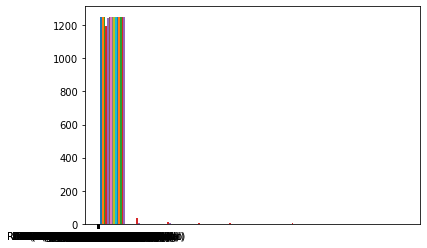

In [321]:
plt.hist(merged_df)